In [151]:
#https://api.got.show/api/characters/locations

1. Motivation
  * What is your dataset?
  * Why did you choose this/these particular dataset(s)?
  * What was your goal for the end user's experience?
2. Basic stats. Let's understand the dataset better
  * Write about your choices in data cleaning and preprocessing
  * Write a short section that discusses the dataset stats (here you can recycle the work you did for Project Assignment A)
3. Tools, theory and analysis. Describe the process of theory to insight
  * Talk about how you've worked with text, including regular expressions, unicode, etc.
  * Describe which network science tools and data analysis strategies you've used, how those network science measures work, and why the tools you've chosen are right for the problem you're solving.
  * How did you use the tools to understand your dataset?
4. Discussion. Think critically about your creation
  * What went well?,
5. What is still missing? What could be improved?, Why?

### Motivation

We have chosen to collect data from the Game of Thrones universe. The data was collected from various sites and API's, such as:
* *API's*:
    * https://api.got.show/api/
* *Sites*:
    * http://gameofthrones.wikia.com/wiki/
    * http://www.avclub.com/tv/game-of-thrones-newbies/ 
    * http://transcripts.foreverdreaming.org/viewtopic.php?t=7739
    * http://genius.com/albums/Game-of-thrones/Season-1-scripts
    * http://genius.com/albums/Game-of-thrones/Season-4-scripts
    * http://genius.com/albums/Game-of-thrones/Season-5-scripts
    * http://genius.com/albums/Game-of-thrones/Season-6-scripts
    
The API found at https://api.got.show/api/ actually uses the data from http://gameofthrones.wikia.com/wiki/, but we had to use both, since their API did not have all data from the site.

*Description of dataset: * 

> We have collected all the characters from Game of Thrones. For each character we have also collected their wikia page and which house they belong to (for community detection)

> AV Club has reviews of almost every episode through the shows runtime. They are missing the first four episodes of the first season. These were not taken elsewhere due to the potential difference in the writing style from another site. These were used for making a sentiment analysis over all of the episodes in the show. 

> Genius had all the scripts for season 1, 4, 5, and 6, but were missing episodes in both season 2 and 3. These were retrieved from Transcripts.com. Though, it wasn't possible to scrape the content of the site via code, so each transcript had to be extracted manually and inserted into a textfile.

We have chosen this particular dataset because:

> One of the ideas with this project was to do text analysis on the show itself, and one of the best ways of doing this is using a transcript as they will tell what happens in each episode. Concerning reviews, we tried to find a site that had reviews for all of the epidodes and we AV Club was the only one we could fine. We initially wanted to use Rotten Tomatoes, as they have a large collection of critic blurbs and binary rating for each episode and they had an API for such purposes, but when we begun the project we discovered that getting access to the API was not possible despite sending requests for an API key. 

Our goal for the end user's experience was to:

> We wanted to do a sentiment analysis to get a grasp of the progress of the show. Game of Thrones is known for shocking and brutal content, so we wanted to see if this would be something we could 

### Basic Stats

Write about your choices in data cleaning and preprocessing

> The data retreived from AV Club and Genius was done using BeautifulSoup, an API to scrape information from web sites. This was done as the sites themselves did not have a web API to retreive the data with. BeautifulSoup made it fairly easy to get the necessary text by looking for a unique class pertaining to the body of the site. The text from AV Club went through a cleaning process because the text came with a trivia section. 

> The text was cleaned from stop words and punctuation. For the word cloud, each episode in a season was collapsed into one text string. Afterwards, the text was sent through a TF-IDF process and used to generate the word cloud.

Write a short section that discusses the dataset stats (here you can recycle the work you did for Project Assignment A)

> * There are 56 reviews with an average character length of 9669 characters or about 1671 words.
* There are 60 transcripts with an average character length of 30205 or about 5311 words.



### Tools, theory and analysis
   
Talk about how you've worked with text, including regular expressions, unicode, etc.

> No regular rexpressions were used. The text was decoded using UTF-8. Any unicode error was ignored and the character omitted.  

Describe which network science tools and data analysis strategies you've used, how those network science measures work, and why the tools you've chosen are right for the problem you're solving.

> * TF-IDF  
Term Frequency Inverse Document Frequency is used to calculate the frequency of each term in a given document. It it used to discover the presence, how often it used, in a document. It is created by counting how many times any word exists in a text, which gives the TF. The IDF is then calculated by dividing the total number of texts with the number of texts containing the word and taking the logarithm of that. These two are then multiplied with each other, creating the TF-IDF value for the term. We used TF-IDF as it was necessary in order to create a word cloud. 
A numerical statistic that is intended to reflect how important a word is to a document in a collection or corpus.
* Sentiment Analysis  
Sentiment analysis is, as the term implies, used to determine the sentiment, the attitude, of a given piece of text. This is done by determining, for example in our case, the happiness rating of each word. We have used the [LabMT](http://journals.plos.org/plosone/article/file?type=supplementary&id=info:doi/10.1371/journal.pone.0026752.s001) data set for our happiness scale. The sentiment score for the text is then the sum of each word in the given text. We have chosen to do a sentiment analysis per episode.
* Word cloud  
A word cloud is essentially a visual representation of the term frequency for the analysed. The size of each word in the cloud corresponds to the quantity of said word. 

How did you use the tools to understand your dataset?

> ...

### Discussion
What went well?  

> What accomplished most of what we set out to do with this project. 

What is still missing? What could be improved?, Why? 

> We are missing the Twitter part, which was dropped due to issues with the API. Too many retweets made the data uninteresting and unfit for our purpose. Other than that, we had to look for a difference source for our reviews as Rotten Tomatoes would not give us an API key to access their data.

In [3]:
import nltk
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
import string
%matplotlib inline

# Remove all words containing digits
def containsDigit(s):
    try:
        for a in str(s):
            if a.isdigit():
                return True
    # workaround for unicode issues
    except UnicodeEncodeError:
        return True
    return False

# Remove stop words and punctuation and tokenize 
def cleanText(episode):
    return [x.lower() for x in episode if x.lower() not in stopwords.words('english') and True not in [t in string.punctuation for t in x] and not containsDigit(x)]

wordlist = dict()
for i, line in enumerate(open('DataSetS1.txt', 'r')):
    if i > 3:
        data = line.strip().split('\t')
        # read the word and happiness_avg into a dict.
        wordlist[data[0].lower()] = float(data[2])
        
def calcSentiment(tokens):
    sentiment = 0.0
    for token in tokens:
        t = token.lower()
        if t in wordlist:
            sentiment += wordlist[t]
    sentiments = sentiment / len(tokens)
    return sentiments

In [4]:
from bs4 import BeautifulSoup
import urllib2, json
import warnings
warnings.filterwarnings("ignore")

def getSeasons():
    url = "http://www.avclub.com"
    result = []
    baseurl="http://www.avclub.com/tv/game-of-thrones-newbies/?season=1"
    query = "%s" % (baseurl)
    response = urllib2.urlopen(query)
    source = response.read()

    soup = BeautifulSoup(source, from_encoding=response.info().getparam('charset'))
    
    for link in soup.find_all('a', href=True):
        if 'season' in link['href']:
            result.append(url + link['href'])
    return result

def getReviews(baseurl):
    print baseurl
    url = "http://www.avclub.com"
    result = []
#    baseurl="http://www.avclub.com/tv/game-of-thrones-newbies/?season=1"
    query = "%s" % (baseurl)
    response = urllib2.urlopen(query)
    source = response.read()

    soup = BeautifulSoup(source, from_encoding=response.info().getparam('charset'))

    for link in soup.find_all('a', href=True):
        if link.has_attr('title'):
            if 'Game Of Thrones (newbies)' in link['title']:
                result.append(url + link['href'])
    return result[1:]

def getReview(baseurl):
    query = "%s" % (baseurl)
    response = urllib2.urlopen(query)
    source = response.read()
    soup = BeautifulSoup(source)
    article = soup.find_all('section', {'class':"article-text"})[0].text
    return article

data = []
for season in getSeasons():
    reviews = getReviews(season)
    for review in reviews:
        # The syntax for these two episodes does not follow the rest, so they had to be added manually by links
        if 'mountain-and-viper' in review:
            data.append(getReview("http://www.avclub.com/tvclub/game-thrones-newbies-laws-gods-and-men-204527"))
            data.append(getReview("http://www.avclub.com/tvclub/game-thrones-newbies-mockingbird-204801"))
        data.append(getReview(review))
print 'donesie onesie'

http://www.avclub.com/tv/game-of-thrones-newbies/?season=6
http://www.avclub.com/tv/game-of-thrones-newbies/?season=5
http://www.avclub.com/tv/game-of-thrones-newbies/?season=4
http://www.avclub.com/tv/game-of-thrones-newbies/?season=3
http://www.avclub.com/tv/game-of-thrones-newbies/?season=2
http://www.avclub.com/tv/game-of-thrones-newbies/?season=1
donesie onesie


In [5]:
# Remove the 'stray observations' section from each article
d1 = data
for index, a in enumerate(d1):
    d1[index] = a.split('Stray observations')[0]
#d = list(reversed(d))
print len(d1)

56


In [6]:
colors = ['g','b','y','r']
# For each of the novels, calculate the sentiment profile
sentimentscores1 = []
for i, text in enumerate(d1):
#     xs = list()
    ys = list()
    y = calcSentiment(text)
    sentimentscores1.append(y)
    ys.append(y)

56 56


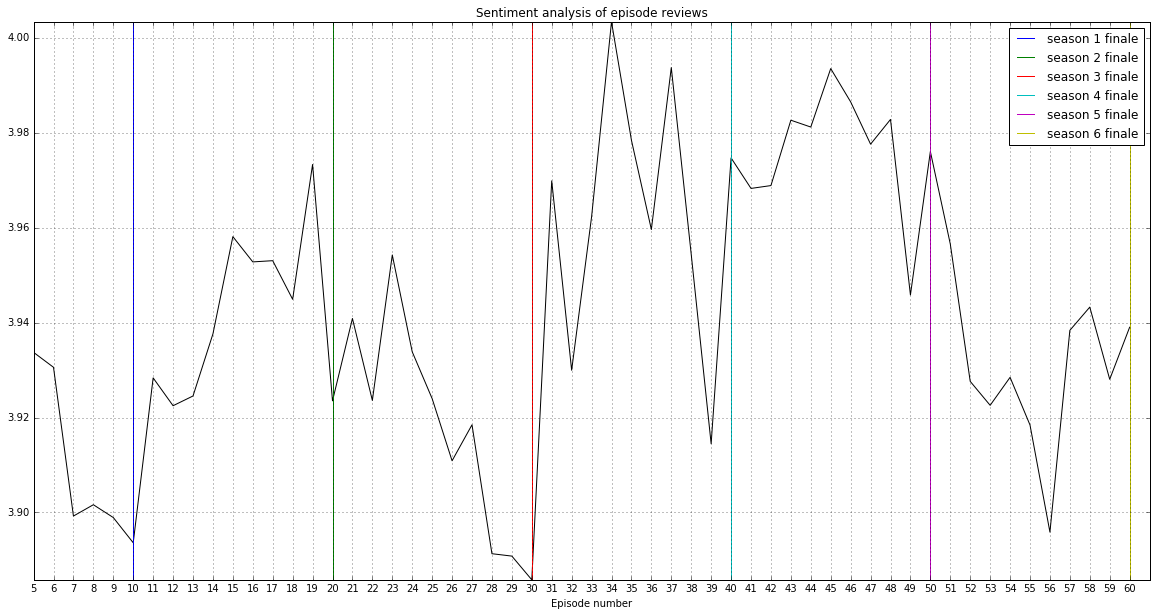

In [84]:
# The array is stored from season 6 to 1, so the list is reversed to counteract this
senti = list(reversed(sentimentscores1))
l = range(5, 61)
print len(senti), len(l)
plt.figure(figsize=(20,10))
plt.plot(l, senti, '-', color='black')
plt.plot((10, 10), (min(senti), max(senti)), '-', label='season 1 finale')
plt.plot((20, 20), (min(senti), max(senti)), '-', label='season 2 finale')
plt.plot((30, 30), (min(senti), max(senti)), '-', label='season 3 finale')
plt.plot((40, 40), (min(senti), max(senti)), '-', label='season 4 finale')
plt.plot((50, 50), (min(senti), max(senti)), '-', label='season 5 finale')
plt.plot((60, 60), (min(senti), max(senti)), '-', label='season 6 finale')
plt.xticks(l)
plt.xlim(5, 61)
plt.ylim(min(senti), max(senti))
plt.grid(True)
plt.legend()
plt.xlabel('Episode number')
plt.title("Sentiment analysis of episode reviews")
plt.show()

The graph shows the sentiment score for each episode. The seasons are separated with a vertical black line.  
We can see that the first season dips quite low towards the end, which would make sense considering that this is when, spoiler warning, Eddard Stark gets his head chopped off and put on a pike, which, considering the popularity of the character, won't be talked about in particularly happy tones.  
  
During the first couple of seasons, there is seemingly a trend for the finale to leave the viewer in an unhappy mood, with the end of season 3 being a particularly dour moment in the series with a few instances of bodily desecrations, one being of the trouser-sausage variety.  
  
From the fourth season on, there's an indication that the second-to-last episode is where the shows gets darkest before a vindication of the characters the audience cheers for during the finale.

In [8]:
import requests
from bs4 import BeautifulSoup
import urllib2, json
import warnings
warnings.filterwarnings("ignore")

# Extract the links to each season containing transcripts for each episode
def getSeason(season=1):
    result = []
    url = "http://genius.com/albums/Game-of-thrones/Season-" + str(season) + "-scripts"
    soup = BeautifulSoup(requests.get(url).text)
    for link in soup.find_all('a', href=True):
        if 'annotated' in link['href'] and 'Game-of-thrones' in link['href'] and 'preview' not in link['href']:
            result.append(link['href'])
    return result

# Scrape the body text (the episode transcript) from HTML code from Genius
def getScript(url):
    soup = BeautifulSoup(requests.get(url).text)
    return soup.find_all('lyrics', {'class':"lyrics"})[0].text

# Get missing transcripts from local storage (manually downloaded from transcripts.com)
def getEpisodeFromFile(season, episode):
    data = ""
    with open('got/' + str(season) + '_' + str(episode) + '.txt', 'r') as myfile:
        data = myfile.read().replace('\n', '')
    return data

# All episodes are thrown together in one big array in sequential order
d2 = []
for season in [1,4,5,6]:
    if season == 4:
        for s in range(2,4):
            for e in range(1,11):
                d2.append(getEpisodeFromFile(s, e))
    s = getSeason(season=season)
    for episode in s:
        d2.append(getScript(episode))
    
print 'donesie onesie'

donesie onesie


In [9]:
colors = ['g','b','y','r']
# For each of the novels, calculate the sentiment profile.
sentimentscores2 = []
for i, text in enumerate(d2):
#     xs = list()
    ys = list()
    y = calcSentiment(text)
    sentimentscores2.append(y)
    ys.append(y)
print "done"

done


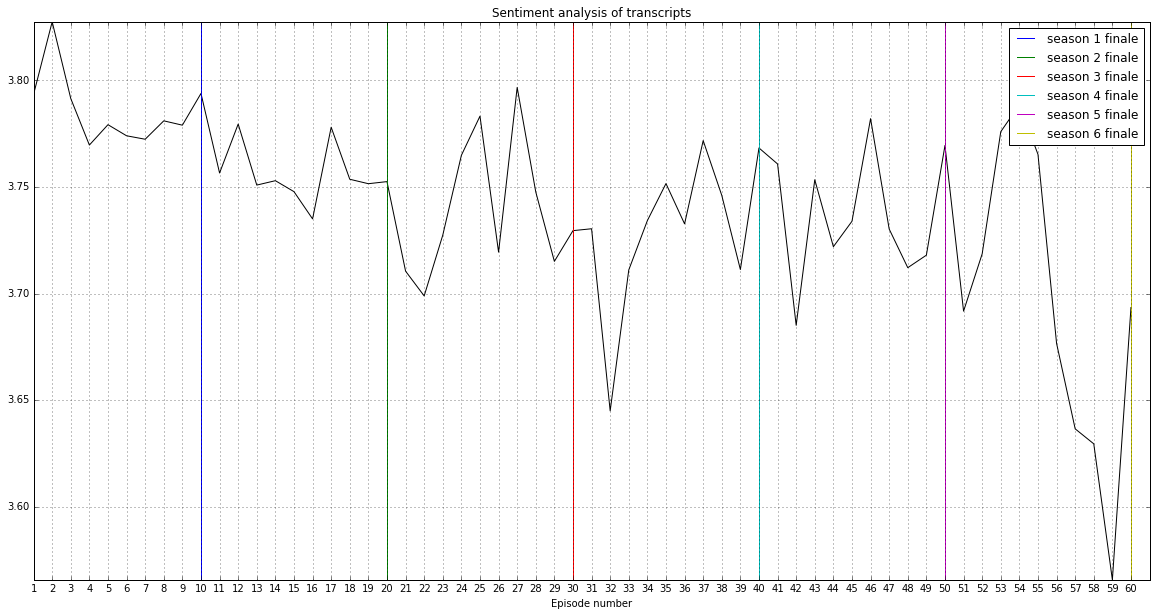

In [87]:
senti = list(reversed(sentimentscores2))
l = range(1, 61)
plt.figure(figsize=(20,10))
plt.plot(l, senti, '-', color='black')
plt.plot((10, 10), (min(senti), max(senti)), '-', label='season 1 finale')
plt.plot((20, 20), (min(senti), max(senti)), '-', label='season 2 finale')
plt.plot((30, 30), (min(senti), max(senti)), '-', label='season 3 finale')
plt.plot((40, 40), (min(senti), max(senti)), '-', label='season 4 finale')
plt.plot((50, 50), (min(senti), max(senti)), '-', label='season 5 finale')
plt.plot((60, 60), (min(senti), max(senti)), '-', label='season 6 finale')
plt.xticks(l)
plt.xlim(1, 61)
plt.ylim(min(senti), max(senti))
plt.grid(True)
plt.legend()
plt.xlabel('Episode number')
plt.title("Sentiment analysis of transcripts")
plt.show()

It is harder to decern the sentiment of the transcripts. There is a tendency towards a decline in happiness through the series, with a few spikes both up- and downwards and an outlier towards the second-to-last episode of the series with episode 59. This seems to sugges that the tone, while having spikes here and there, gets steadily darker as the show progresses.

# Character Map

In [164]:
import urllib2, json

baseurl="https://api.got.show/api/characters/paths"
query = "%s" % (baseurl)
response = urllib2.urlopen(query)
source = response.read()
d = json.loads(source)

In [166]:
def get_spaced_colors(n):
    max_value = 16581375 #255**3
    interval = int(max_value / n)
    colors = [hex(I)[2:].zfill(6) for I in range(0, max_value, interval)]
    
    return [((1.0/255.0)*float(int(i[:2], 16)), (1.0/255.0)*float(int(i[2:4], 16)), (1.0/255.0)*float(int(i[4:], 16))) for i in colors]

t = get_spaced_colors(len([x for x in d if x['path'][-1]['alive'] == False]))
print t

[(0.0, 0.0, 0.0), (0.08235294117647059, 0.08235294117647059, 0.5843137254901961), (0.16470588235294117, 0.16862745098039217, 0.16470588235294117), (0.24705882352941178, 0.25098039215686274, 0.7490196078431373), (0.32941176470588235, 0.33725490196078434, 0.32941176470588235), (0.4117647058823529, 0.4196078431372549, 0.9137254901960784), (0.49411764705882355, 0.5058823529411764, 0.49411764705882355), (0.5764705882352941, 0.592156862745098, 0.07450980392156863), (0.6588235294117647, 0.6745098039215687, 0.6588235294117647), (0.7411764705882353, 0.7607843137254902, 0.2392156862745098), (0.8235294117647058, 0.8431372549019608, 0.8235294117647058), (0.9058823529411765, 0.9294117647058824, 0.403921568627451), (0.9921568627450981, 0.00784313725490196, 0.9882352941176471)]


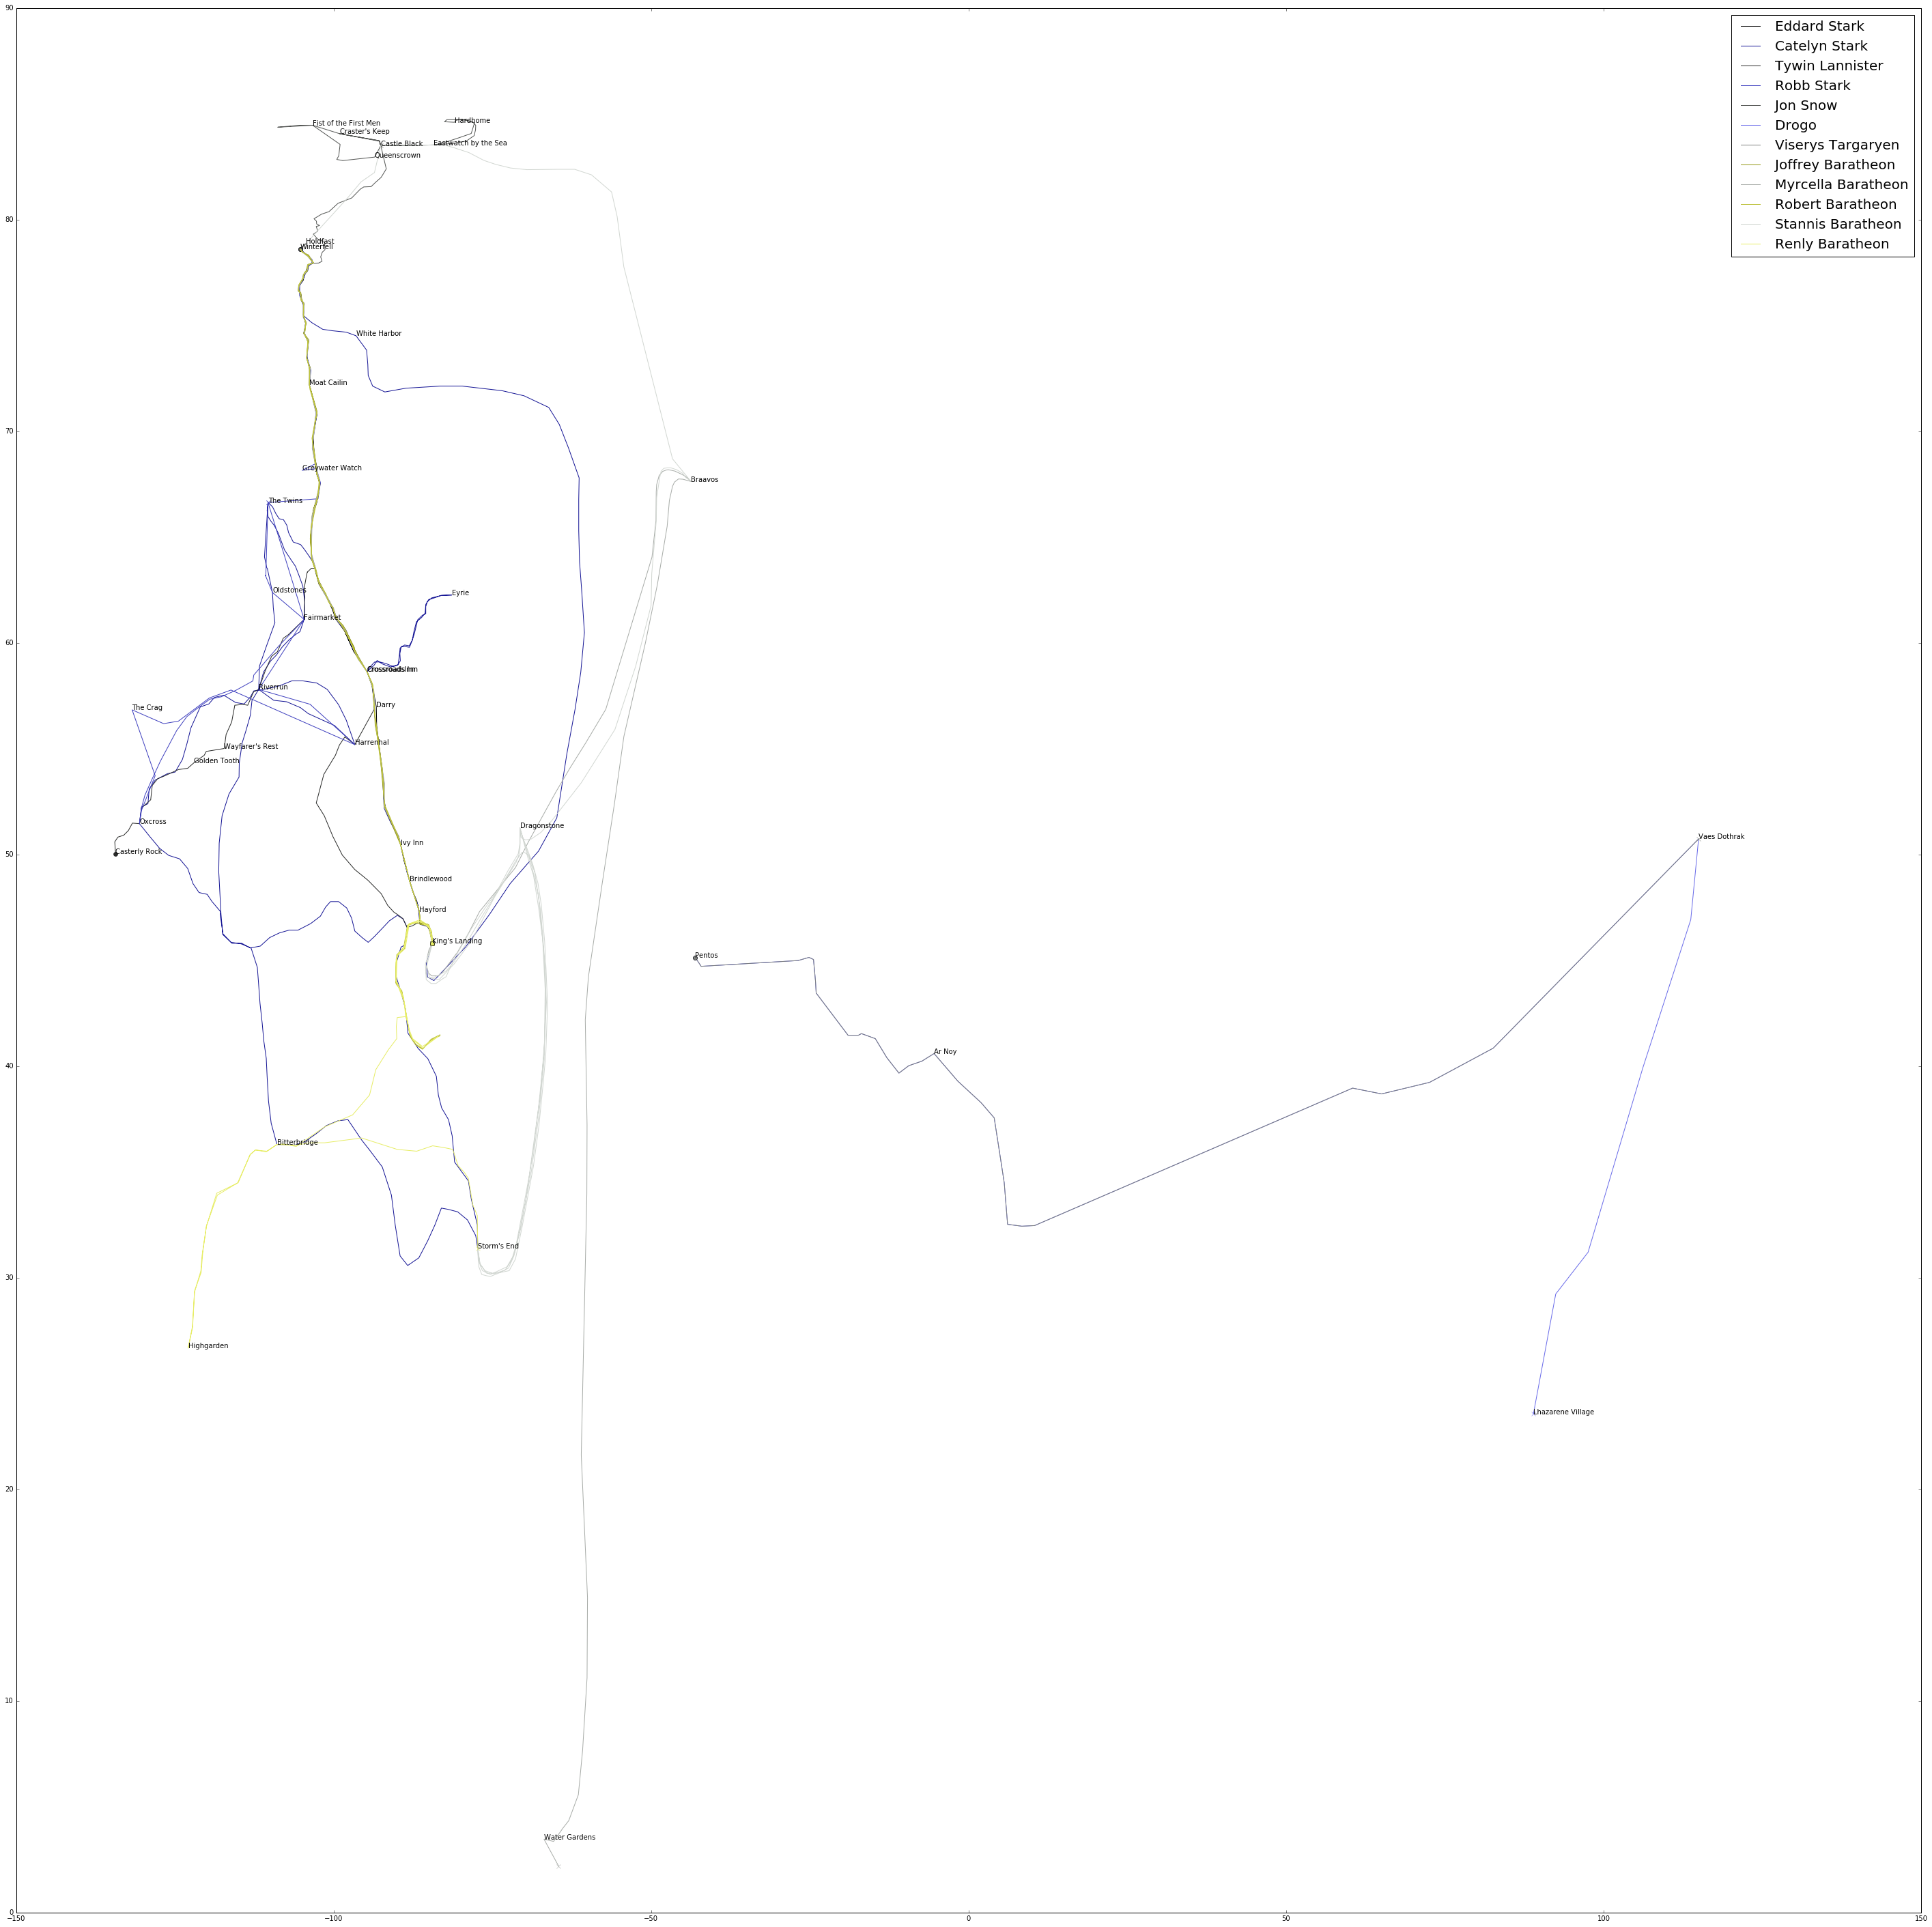

In [171]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
i = 0
cities = {}
plt.figure(figsize=(50,50))

for a in d:
    if a['path'][-1]['alive'] == False:
        for b in a['path']:
            for c in b['path']:
                if len(c) == 3:
                    cities[c[2]] = (c[1], c[0])

for char in d:
    plot = []
    if char['path'][-1]['alive'] == False:
        for a in char['path']:
            for b in a['path']:
                plot.append((b[1], b[0]))
#                 if len(b) == 3 and b[2] not in cities:
#                     cities.append(b[2])
        #c=np.random.rand(3,1)
        plt.plot(*zip(*plot), label=char['name'], color=t[i])
        plt.plot(plot[-1][0], plot[-1][1], 'x', color=t[i])
        plt.plot(plot[0][0], plot[0][1], 'o', color=t[i])
        #plt.text(plot[0][0], plot[0][1], char['name'], color=t[i])
        i += 1
for a in cities:
    plt.text(cities[a][0], cities[a][1], a)
plt.legend(prop={'size':20})
plt.show()
plt.savefig('hat.png')

# Word Cloud

In [60]:
stops = [x[:-1].lower() for x in open('stopwords.txt', 'r').readlines()]

In [62]:
def BagOfWords(txt):
    return nltk.FreqDist([x.lower() for x in nltk.word_tokenize(txt) if x.lower() not in stopwords.words('english') and x.lower() not in stops and True not in [t in string.punctuation for t in x]])

s1 = BagOfWords(''.join(d2[:10]))
s2 = BagOfWords(''.join(d2[10:20]))
s3 = BagOfWords(''.join(d2[20:30]))
s4 = BagOfWords(''.join(d2[30:40]))
s5 = BagOfWords(''.join(d2[40:50]))
s6 = BagOfWords(''.join(d2[50:]))

totalWordOccurrances = {} # number of articles each word occurs in
allWords = {}             # a dictionary housing all words

for a in [s1, s2, s3, s4, s5, s6]:
    for word in a.keys():
        if word in totalWordOccurrances:
            totalWordOccurrances[word] += 1
        else:
            totalWordOccurrances[word] = 1
            allWords[word] = 0.0

In [63]:
import numpy as np
import nltk
from scipy import sparse
from nltk.corpus import stopwords
import math, string
import matplotlib.pyplot as plt
from scipy.misc import imread
from wordcloud import WordCloud
import random
%matplotlib inline

# This function is from the word cloud documentation. It returns a random grey colour for the word cloud.
def grey_color(word, font_size, position, orientation, random_state=None, **kwargs):
    return 'hsl(0, 0%%, %d%%)' % random.randint(50, 100)

# Creates a bag of words, removing stop words and punctuation.
def BagOfWords(txt):
    return nltk.FreqDist([x.lower() for x in nltk.word_tokenize(txt) if x.lower() not in stopwords.words('english') and True not in [t in string.punctuation for t in x]])

# Creates a string consisting of all words in the TF-IDF, with each word repeated according to its frequency
def generateWordcloudString(td_idf_dict):
    result = ""
    for word, td_idf in td_idf_dict.iteritems():
        result += (word + " ") * int(round(td_idf))
    return result

# Generates the word clou
def generateWordcloud(string, title):
    got_mask = imread("got.jpg")
    wordcloud = WordCloud(width=1920, height=1080, background_color="black", mask=got_mask).generate(string)
    plt.figure(figsize = (15,15))
    plt.imshow(wordcloud.recolor(color_func=grey_color, random_state=3))
    plt.title(title)
    plt.axis('off')
    plt.show()
    
def doIt(hat, i):
    tf_idf = {}
    for key, value in hat.iteritems():
        tf_idf[key] = value * math.log(float(60/totalWordOccurrances[key]))
        #tf_idf[key] = value * math.log(float(len(hat)/value))
    generateWordcloud(generateWordcloudString(tf_idf), "Season " + str(i))
    
# s1 = BagOfWords(''.join(d2[:10]))
# s2 = BagOfWords(''.join(d2[10:20]))
# s3 = BagOfWords(''.join(d2[20:30]))
# s4 = BagOfWords(''.join(d2[30:40]))
# s5 = BagOfWords(''.join(d2[40:50]))
# s6 = BagOfWords(''.join(d2[50:]))

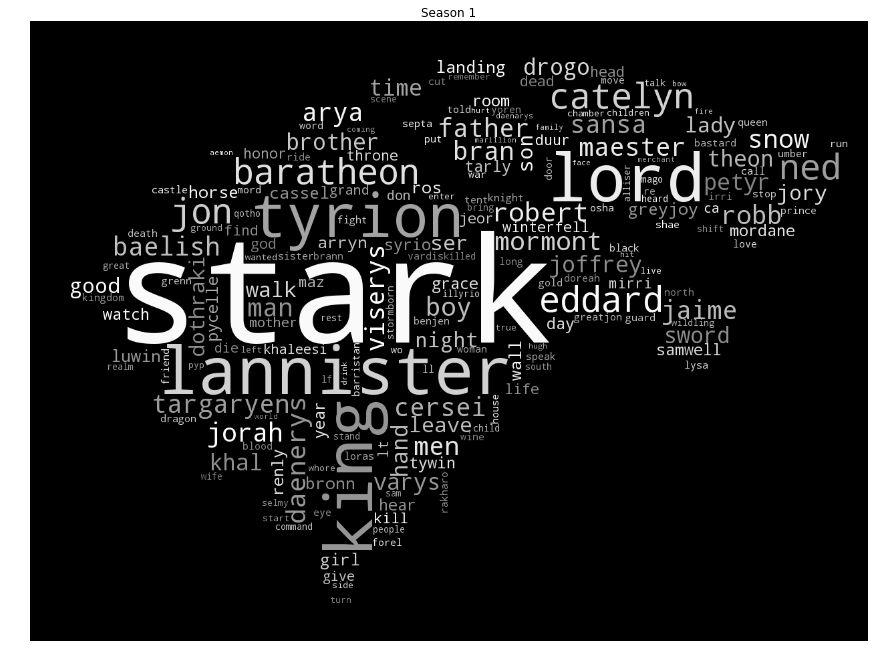

In [64]:
doIt(s1, 1)

We can see that Eddard (Ned) Stark is one of the more prominent names in the cloud. Tyrion is larger, but Eddard's name is there at least twice (Eddard and Ned), meaning it would be larger than it shows. Stark is easily the most prominent term, indicating that the Stark family takes up the majority of the screen time, with the Lannisters in second place.

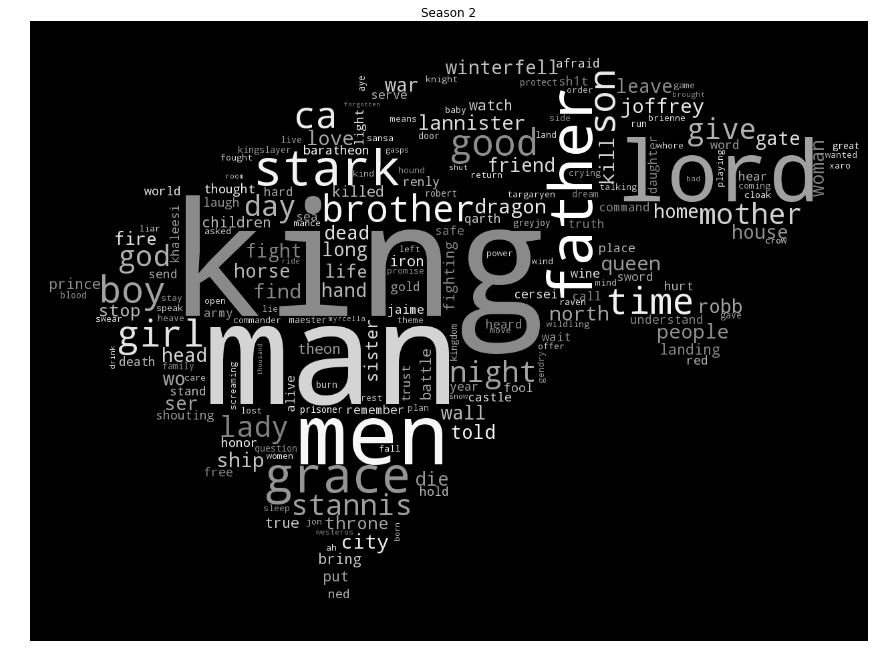

In [65]:
doIt(s2, 2)

We see a stark (hah) decline in the prominence of the Stark house, meaning that either the scripts stop referring to them by their house name, or that other families and characters are put more in focus. We see that the  head of the Stark family, Eddard 'Ned' Stark, is completely absent, which makes sense considering he's dead. King is the most prominent here, indicating that there is a large focus on the king of Winterfell. 

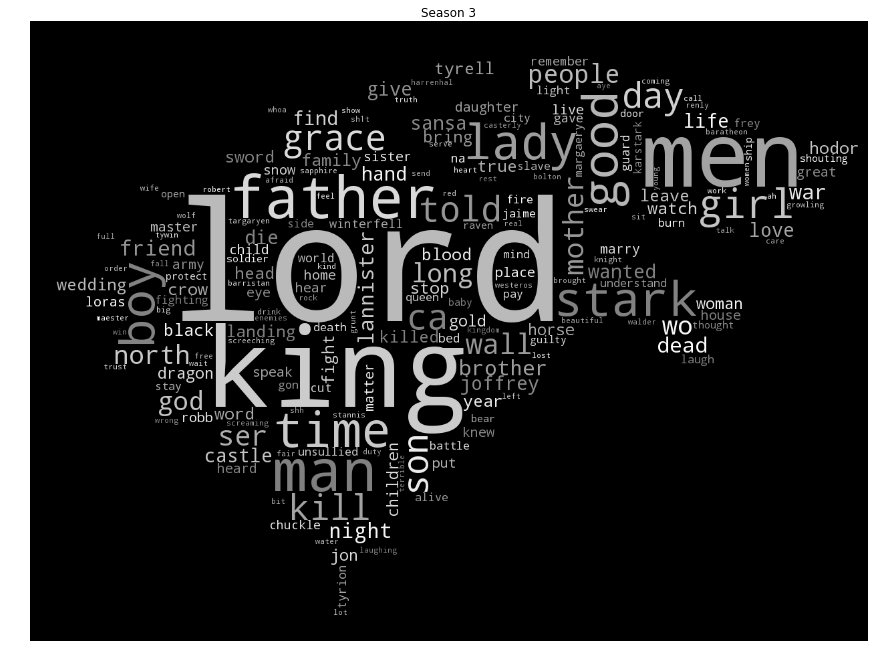

In [66]:
doIt(s3, 3)

The house and character names are starting to decrease significantly, with none of them being particularly prominent during this season. Focus seems to be on the leader of Winterfell instead.

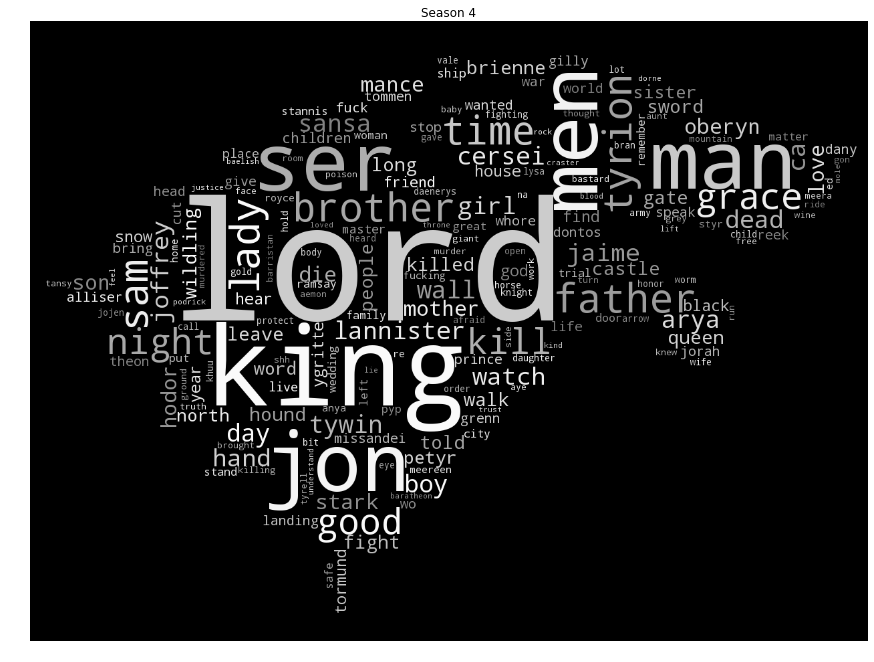

In [67]:
doIt(s4, 4)

The house names are even smaller this time, but we see Jon start to take up more space compared to any other character. 

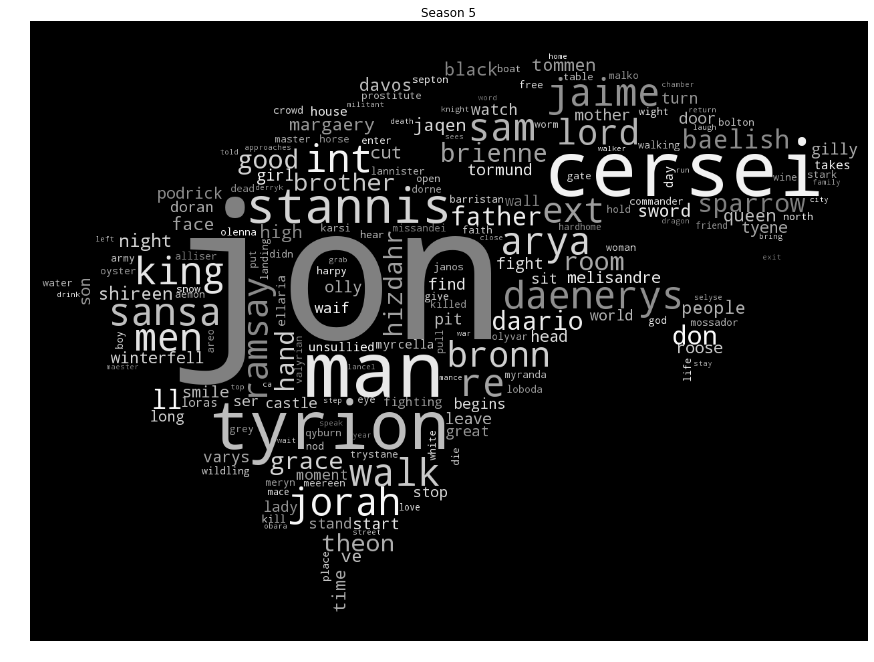

In [68]:
doIt(s5, 5)

Cersei is starting to become a much more prominent character, when Jon doesn't hog the screen time. Everyone's favourite characer, Tyrion, seemingly hasn't decreased in popularity given that his screen time 

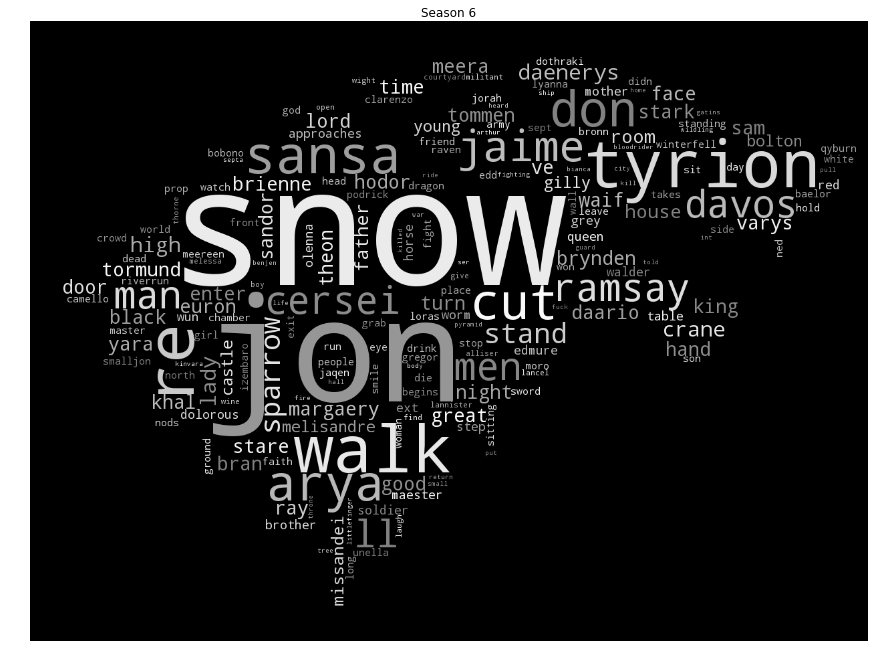

In [69]:
doIt(s6, 6)

It looks like Jon Snow either has an awful lot of screen time or the characters can't stop talking about him this season. Tyrion remains as prominent as ever. Ramsay is given more attention here than previously, which makes sense considering this was the season where Jon Snow's army fought against Ramsay's army. 